In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import networkx as nx
import copy

# COLORS

In [2]:
with open('data/random_graphs_colors_dim3_train.pkl', 'rb') as f:
    train_data = pickle.load(f)
print(train_data.keys(), len(train_data['graph_labels']))
with open('data/random_graphs_colors_dim3_test.pkl', 'rb') as f:
    test_data = pickle.load(f)
print(test_data.keys(), len(test_data['graph_labels']))

dict_keys(['Adj_matrices', 'GT_attn', 'graph_labels', 'node_features', 'N_edges']) 500
dict_keys(['Adj_matrices', 'GT_attn', 'graph_labels', 'node_features', 'N_edges']) 7500


In [3]:
def copy_data(data, idx):
    data_new = {}
    for key in data:
        data_new[key] = copy.deepcopy([data[key][i] for i in idx])
        if key in ['graph_labels', 'N_edges']:
            data_new[key] = np.array(data_new[key]).astype(np.int32)
        #print(key, len(data_new[key]))

    return data_new

def plot_hist(data):
    shapes = np.array([A.shape[0] for A in data['Adj_matrices']])
    plt.figure(figsize=(18, 5))
    plt.subplot(131)
    label_bins = len(np.unique(data['graph_labels']))
    plt.hist(data['graph_labels'], bins=label_bins)
    plt.xlabel(r'Graph label (number of green nodes), $N_{green}$', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.subplot(132)
    plt.hist(shapes, bins=np.unique(shapes)+1)
    plt.xlabel(r'Graph size (number of nodes), $N$', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.subplot(133)
    plt.hist2d(data['graph_labels'], shapes, bins=[label_bins, 20])
    plt.xlabel(r'Graph label (number of green nodes), $N_{green}$', fontsize=12)
    plt.ylabel(r'Graph size (number of nodes), $N$', fontsize=12)
    plt.colorbar()
    plt.show()
    print('Correlation between the graph size and labels: %.2f' % 
          np.corrcoef(data['graph_labels'], shapes)[0,1])

## COLORS-Train

COLORS-Train: 500 graphs, N_nodes_min=4, N_nodes_max=25


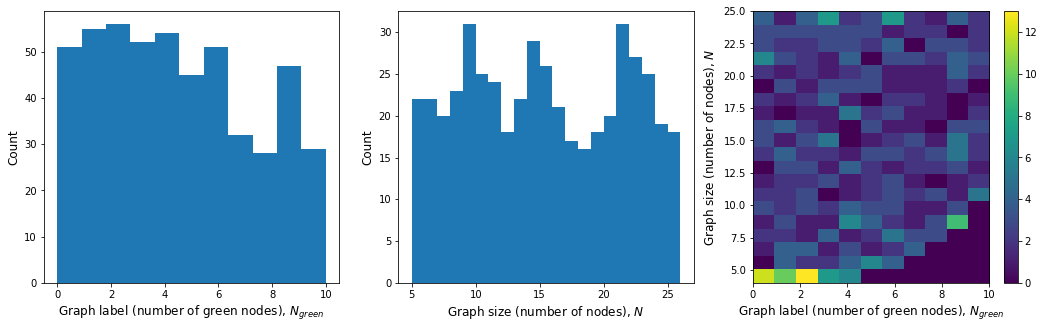

Correlation between the graph size and labels: 0.15

Example of a training graph


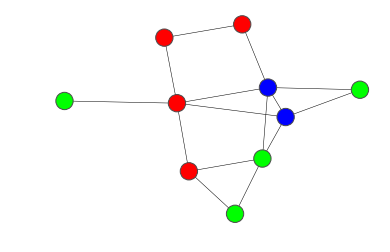

N_nodes 10
graph_labels 4
N_edges 15


In [4]:
shapes = np.array([A.shape[0] for A in train_data['Adj_matrices']])
print('COLORS-Train: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), shapes.min(), shapes.max()))

plot_hist(train_data)

print('\nExample of a training graph')
idx = np.where((shapes == 10) & (train_data['graph_labels'] == 4))[0]
for i, ind in enumerate(idx[1:2]):
    G = nx.from_numpy_array(train_data['Adj_matrices'][ind])
    fig = plt.figure()
    nx.draw_networkx(G, node_color=train_data['node_features'][ind], 
                     with_labels=False, width=0.5, edgecolors=[0.3, 0.3, 0.3, 0.1])
    plt.axis('off')    
    plt.show()
    print('N_nodes %d' % train_data['Adj_matrices'][ind].shape[0])
    for key in train_data:
        if isinstance(train_data[key][ind], np.ndarray):
            #print(key, '\n', train_data[key][ind].astype(np.int32))
            pass
        else:
            print(key, train_data[key][ind])

## COLORS-Test-Orig

COLORS-Test-Orig: 2500 graphs, N_nodes_min=4, N_nodes_max=25


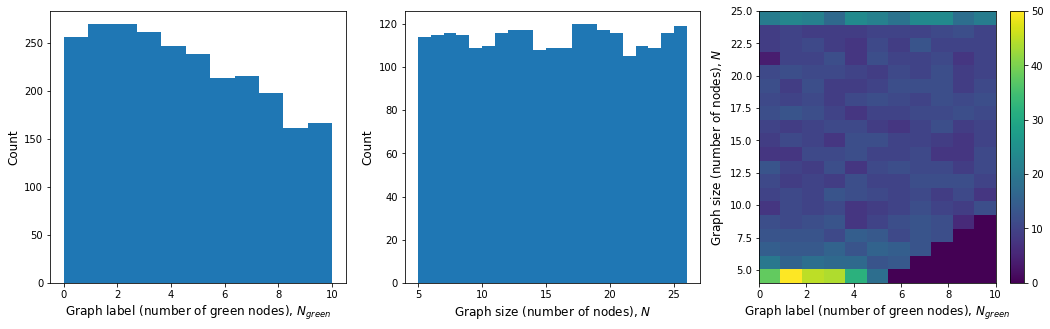

Correlation between the graph size and labels: 0.24

Example of a test-orig graph


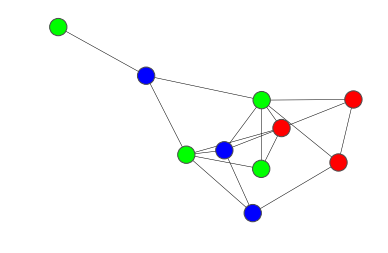

N_nodes 10
graph_labels 4
N_edges 18


In [5]:
test_data_orig = copy_data(test_data, np.arange(2500))
shapes = np.array([A.shape[0] for A in test_data_orig['Adj_matrices']])
print('COLORS-Test-Orig: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), 
                                                                           shapes.min(), shapes.max()))

plot_hist(test_data_orig)

print('\nExample of a test-orig graph')

idx = np.where((shapes == 10) & (test_data_orig['graph_labels'] == 4))[0]
for i, ind in enumerate(idx[1:2]):
    G = nx.from_numpy_array(test_data_orig['Adj_matrices'][ind])
    fig = plt.figure()
    nx.draw_networkx(G, node_color=test_data_orig['node_features'][ind], 
                     with_labels=False, width=0.5, edgecolors=[0.3, 0.3, 0.3, 0.1])
    plt.axis('off')    
    plt.show()
    print('N_nodes %d' % test_data_orig['Adj_matrices'][ind].shape[0])
    for key in test_data_orig:
        if isinstance(test_data_orig[key][ind], np.ndarray):
            #print(key, '\n', test_data_orig[key][ind].astype(np.int32))
            pass
        else:
            print(key, test_data_orig[key][ind])

## COLORS-Test-Large

COLORS-Test-Large: 2500 graphs, N_nodes_min=26, N_nodes_max=200


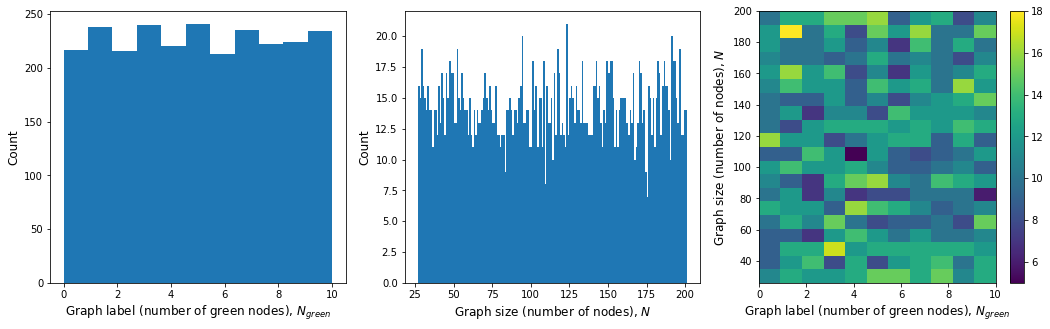

Correlation between the graph size and labels: -0.01

Example of a test-large graph


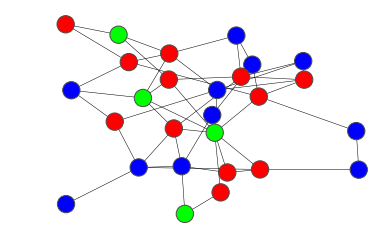

N_nodes 27
graph_labels 4
N_edges 49


In [6]:
test_data_large = copy_data(test_data, np.arange(2500, 5000))

shapes = np.array([A.shape[0] for A in test_data_large['Adj_matrices']])
print('COLORS-Test-Large: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), 
                                                                            shapes.min(), shapes.max()))

plot_hist(test_data_large)

print('\nExample of a test-large graph')

idx = np.where((shapes < 35) & (test_data_large['graph_labels'] == 4))[0]
for i, ind in enumerate(idx[1:2]):
    G = nx.from_numpy_array(test_data_large['Adj_matrices'][ind])
    fig = plt.figure()
    nx.draw_networkx(G, node_color=test_data_large['node_features'][ind], 
                     with_labels=False, width=0.5, edgecolors=[0.3, 0.3, 0.3, 0.1])
    plt.axis('off')    
    plt.show()
    print('N_nodes %d' % test_data_large['Adj_matrices'][ind].shape[0])
    for key in test_data_large:
        if isinstance(test_data_large[key][ind], np.ndarray):
            #print(key, '\n', test_data_large[key][ind].astype(np.int32))
            pass
        else:
            print(key, test_data_large[key][ind])

## COLORS-Test-LargeC

COLORS-Test-LargeC: 2500 graphs, N_nodes_min=26, N_nodes_max=200


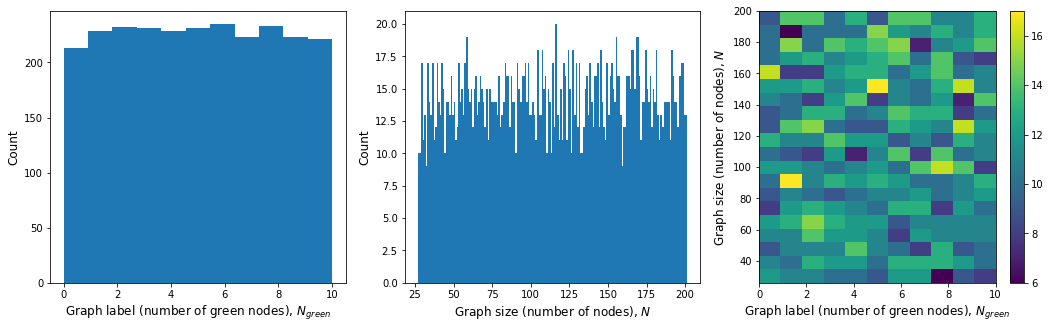

Correlation between the graph size and labels: 0.02

Example of a test-large-c graph


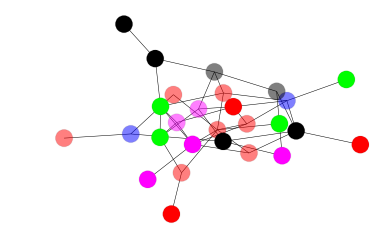

N_nodes 27
graph_labels 4
N_edges 45


In [7]:
test_data_large_c = copy_data(test_data, np.arange(5000, len(test_data['Adj_matrices'])))

shapes = np.array([A.shape[0] for A in test_data_large_c['Adj_matrices']])
print('COLORS-Test-LargeC: {} graphs, N_nodes_min={}, N_nodes_max={}'.format(len(shapes), 
                                                                             shapes.min(), shapes.max()))

plot_hist(test_data_large_c)

print('\nExample of a test-large-c graph')

idx = np.where((shapes < 35) & (test_data_large_c['graph_labels'] == 4))[0]
for i, ind in enumerate(idx[1:2]):
    G = nx.from_numpy_array(test_data_large_c['Adj_matrices'][ind])
    fig = plt.figure()
    node_features = test_data_large_c['node_features'][ind].astype(np.float32)
    alpha = node_features.copy()[:, 3]
    alpha[alpha == 1] = 0.5
    alpha[alpha == 0] = 1
    pos = nx.spring_layout(G)
    nx.draw_networkx_edges(G, pos, width=0.5)
    nx.draw_networkx_nodes(G, pos, node_color=node_features, alpha=alpha, 
                           edgecolors=[0.3, 0.3, 0.3, 0.1])    
    plt.axis('off')    
    plt.show()
    print('N_nodes %d' % test_data_large_c['Adj_matrices'][ind].shape[0])
    for key in test_data_large_c:
        if isinstance(test_data_large_c[key][ind], np.ndarray):
            #print(key, '\n', test_data_large_c[key][ind].astype(np.int32))
            pass
        else:
            print(key, test_data_large_c[key][ind])